## **Data Dictionary**

Data yang digunakan merupakan data `Titanic` yang diperoleh dari kaggle dengan keterangan sebagai berikut:
- Survival (0:No , 1:yes)
- pclass (1:1st, 2:2nd, 3:3rd)
- embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

## **Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import joblib

In [2]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV,KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
# Pyplot and seaborn style
sns.set(style="whitegrid")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
colormap = sns.diverging_palette(220, 10, as_cmap=True)

## **Data Exploration**

**Input Data**

In [4]:
# Load dataset 
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Information**

In [80]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Statistics Description**

In [81]:
# statistics description 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
# statistics for categorical data
df.select_dtypes('object').describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Check Missing Value**

In [83]:
# number of missing data
null_values = df.isna().sum()
null_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Terdapat missing value pada variabel age, cabin dan embarked

## **Data Visualization**

In [84]:
survived_count=df.groupby('Survived')['Survived'].count()
print(survived_count)

Survived
0    549
1    342
Name: Survived, dtype: int64


0 adalah penumpang yang tidak selamat dan 1 adalah penumpang yang selamat. berdasarkan hasil diatas jumlah penumpang yang tidak selamat lebih banyak dari penumpang yang selamat.

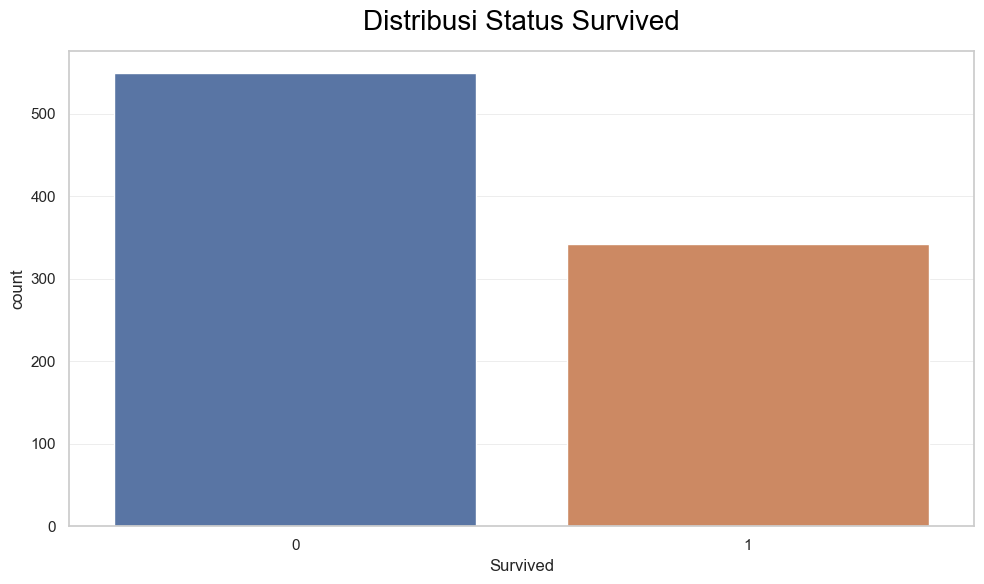

In [85]:
# Plotting Distribution of Status Survived
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Survived')
plt.title('Distribusi Status Survived', fontsize=20, color='black', pad=15)
plt.tight_layout()
plt.show()

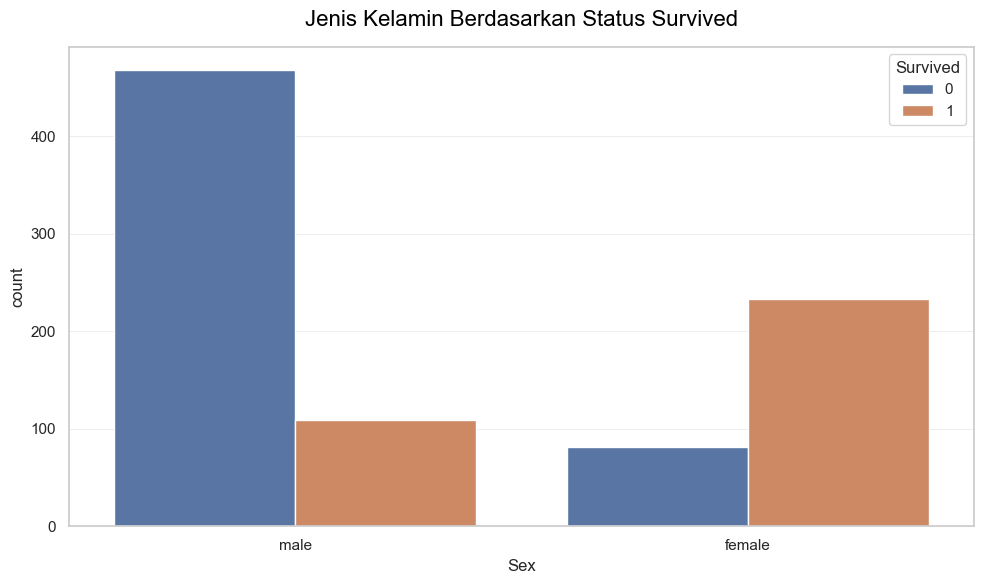

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Jenis Kelamin Berdasarkan Status Survived', fontsize=16, color='black', pad=15)
plt.tight_layout()
plt.show()

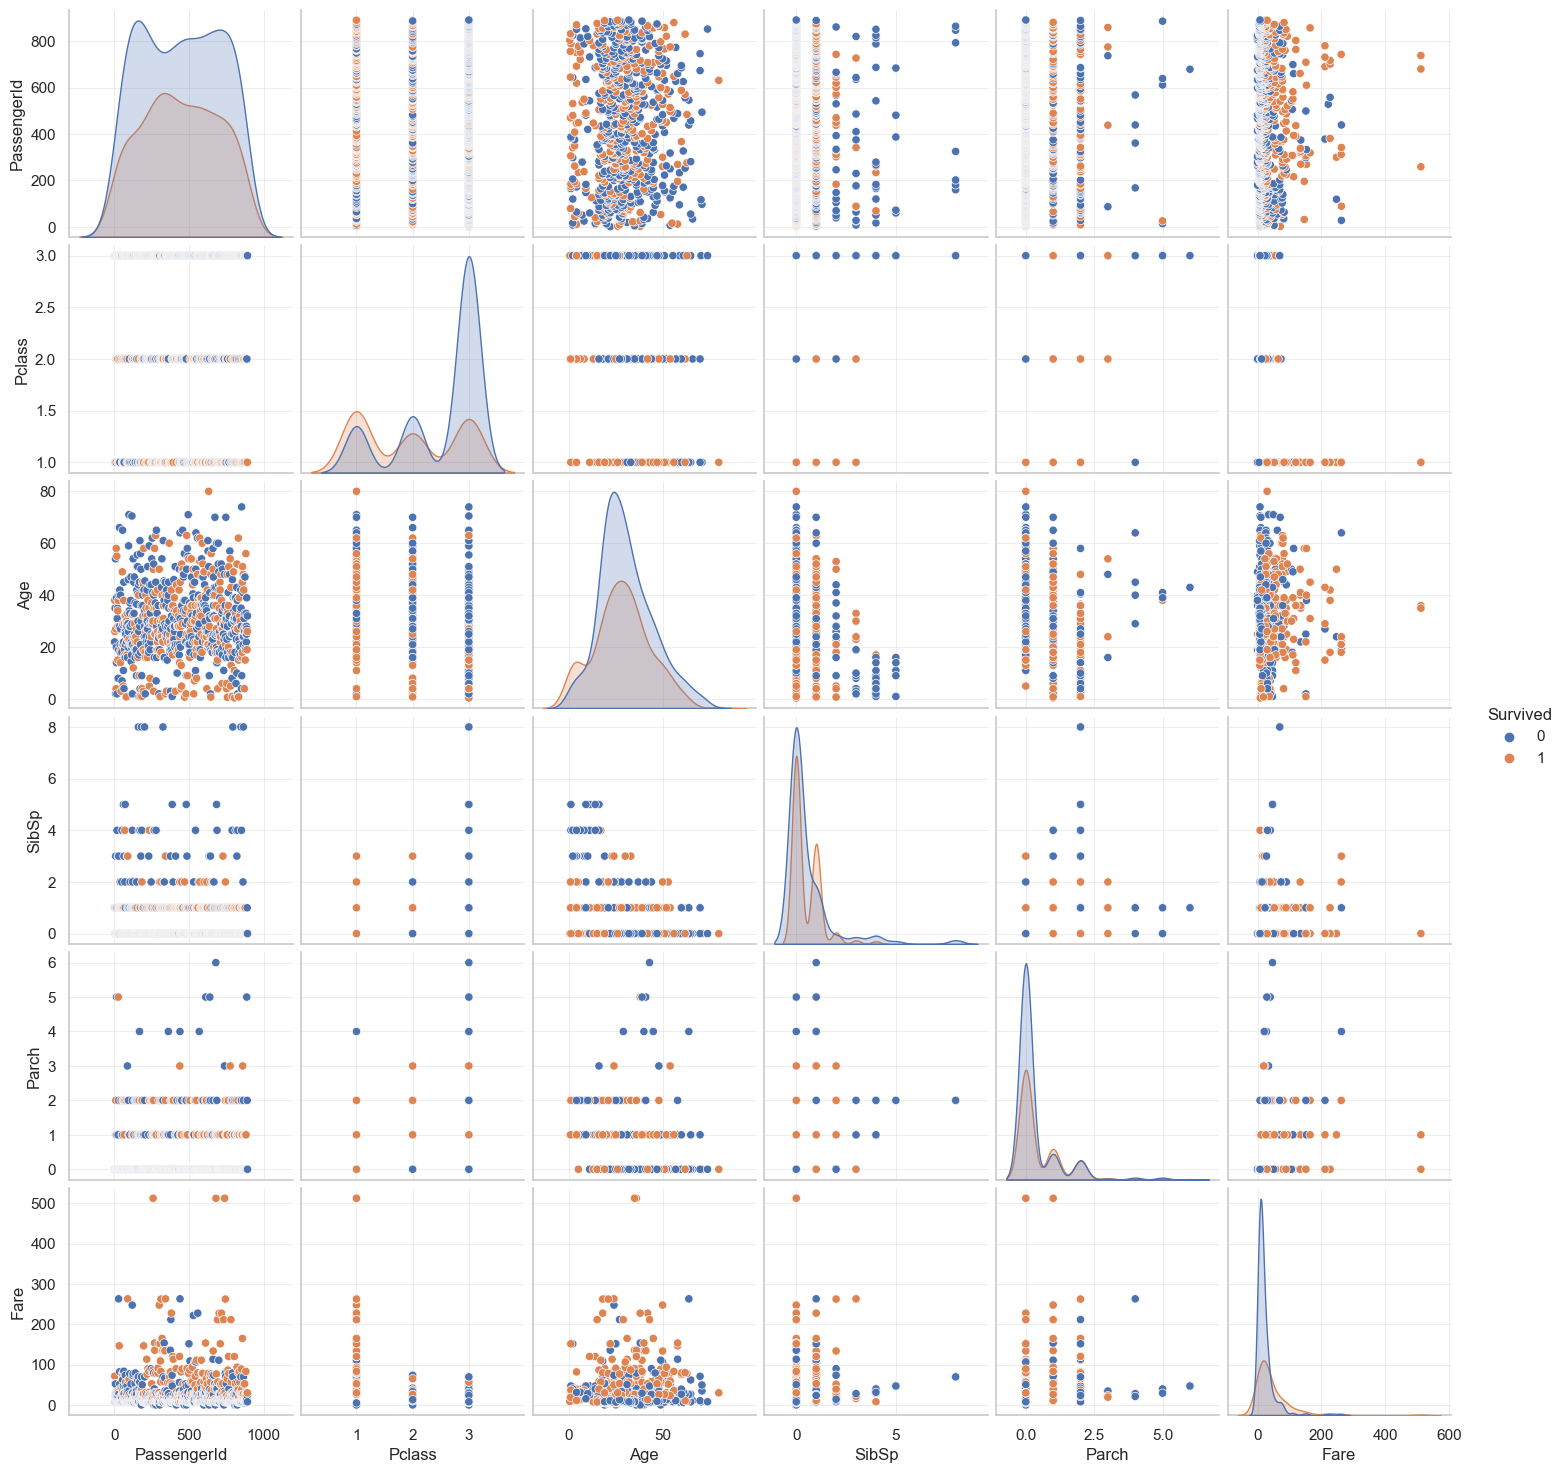

In [11]:
sns.pairplot(df,hue='Survived')

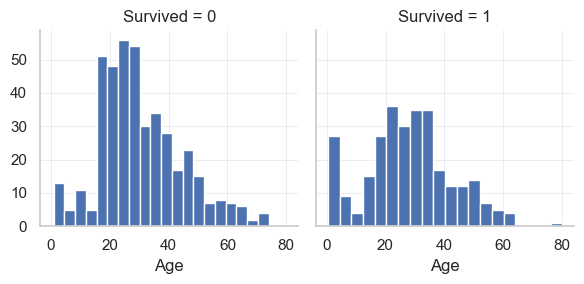

In [12]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

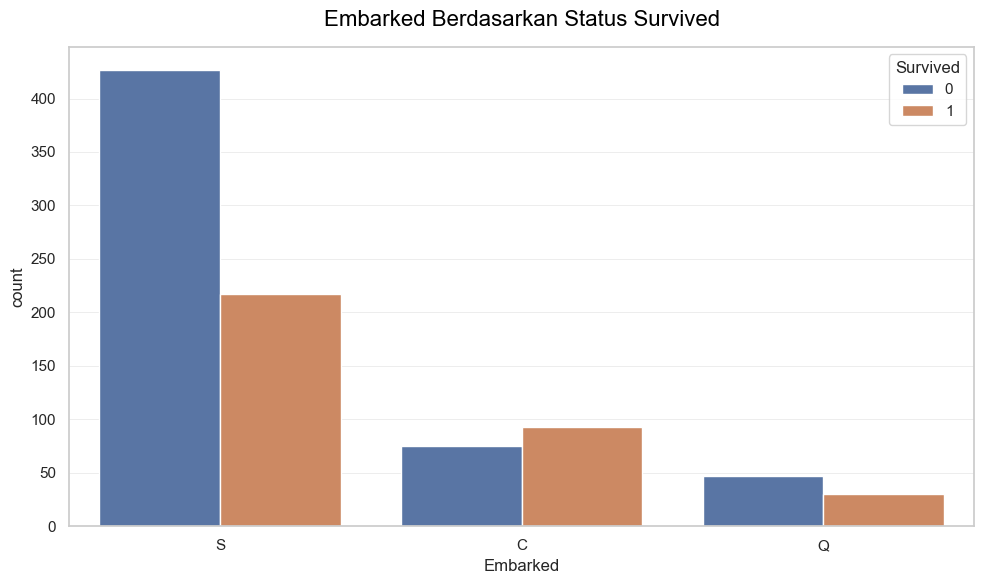

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Embarked Berdasarkan Status Survived', fontsize=16, color='black', pad=15)
plt.tight_layout()
plt.show()

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


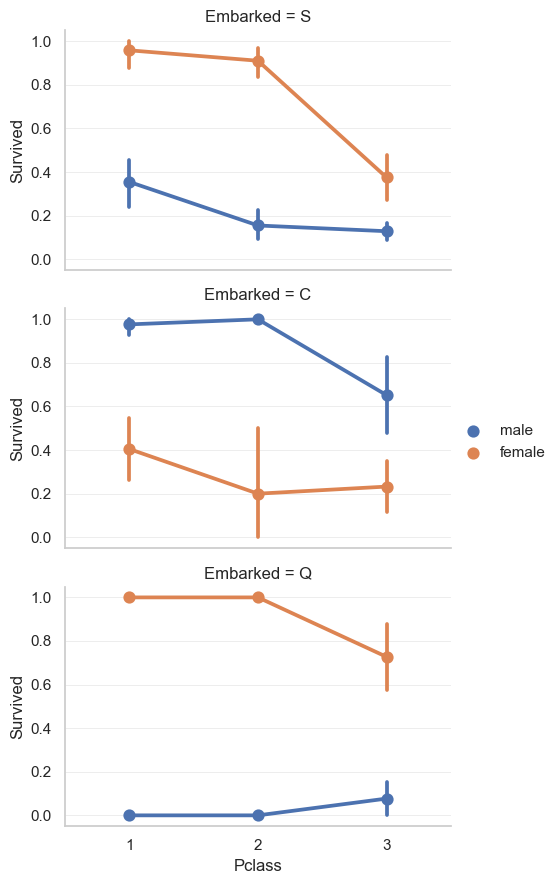

In [14]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(df, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Dengan kategori 0 yaitu No dan kategori 1 Yes, maka:
- Gambar pertama menunjukkan penumpang wanita memiliki tingkat kelangsungan hidup yang jauh lebih baik daripada pria
- Pada embarked = C, pria memiliki tingkat kelangsungan hidup yang lebih baik

## **Data Cleansing**

Pada tahap ini lakukan pembersihan data, mulai dari handling missing value, inconsistent data, outliers, dan konversi tipe data setiap feature sesuai dengan seharusnya.

**Check Cardinality**

Cek apakah terdapat data yang tidak konsisten pada setiap feature. Periksa juga jumlah unik data pada setiap feature.

In [15]:
# get all categorical columns
col_cat = df.select_dtypes('object').columns

# loops for categorical data
for i in col_cat:
    print(df[i].value_counts())
    print()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length:

In [16]:
# The number of unique values of each feature
for i in df.columns:
    print(i, ':', df[i].nunique())

PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 88
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 147
Embarked : 3


**Handling Missing Value**

Replacing null values with median in age column

In [5]:
df.Age=df.Age.fillna(df.Age.median())

Replacing null values with max count in embarked column

In [6]:
df.Embarked=df.Embarked.fillna(df.Embarked.mode()[0])

Menghapus kolom yang tidak penting

In [7]:
df=df.drop(["PassengerId","Name","Cabin","Ticket"],axis=1)

Kategorisasi data pada kolom embarked

In [8]:
obj_dict = {
    'C':1,
    'S':2,
    'Q':3
}
df['Embarked'] = df['Embarked'].replace(obj_dict)

Kategorisasi data pada kolom sex

In [9]:
df["Sex"]=df.Sex.map({"male":0,"female":1})

## **Separating Train and Test Set**

In [10]:
# Separate features and targets
X = df.drop(['Survived'], axis=1)
Y = df['Survived']

In [11]:
import random

Membagi data dengan 80% data training dan 20% data testing

In [12]:
random.seed(12345)
# Separate train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
# Dimension train and test set
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(712, 7) (712,) (179, 7) (179,)


In [14]:
# Check target distribution 
pd.Series(y_train).value_counts()

0    444
1    268
Name: Survived, dtype: int64

## **Modelling**

In [27]:
# Define classier to a list
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(), 
    AdaBoostClassifier(), 
    ExtraTreesClassifier(), 
    GradientBoostingClassifier(),
    XGBClassifier(), 
    BaggingClassifier(),
    KNeighborsClassifier(), 
    LogisticRegression(),
    GaussianNB(), 
    SVC()]


In [28]:
# Create dataframe for model performance result
model_performance = pd.DataFrame(columns=['Method', 'accuracy', 'precision', 'recall', 'f1-score','balanced-accuracy'])

In [29]:
# Train data for each model
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    method = str(type(classifier)).split('.')[-1][:-2]

    # accuracy score
    acc = accuracy_score(y_test, y_pred)

    # precision score
    pre = precision_score(y_test, y_pred)

    # recall score
    re = recall_score(y_test, y_pred)

    # f1 score
    f1 = f1_score(y_test, y_pred)

    # balanced accuracy
    bac = balanced_accuracy_score(y_test, y_pred)

    # Append model performance metrics to dataframe
    model_performance = model_performance.append({
        'Method':method,
        'accuracy':acc,
        'precision':pre,
        'recall':re,
        'f1-score':f1,
        'balanced-accuracy':bac}, ignore_index=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6868\2176305953.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_performance = model_performance.append({
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6868\2176305953.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_performance = model_performance.append({
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6868\2176305953.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_performance = model_performance.append({
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6868\2176305953.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_performance = model_performance.append({
C:\Users

In [30]:
# Sort accuracy, precision, recall, and f1-score in descending order
model_performance.sort_values(['accuracy', 'precision', 'recall', 'f1-score'], ascending=False).reset_index(drop=True)

,Method,accuracy,precision,recall,f1-score,balanced-accuracy
0,ExtraTreesClassifier,0.826816,0.786667,0.797297,0.791946,0.822458
1,RandomForestClassifier,0.815642,0.780822,0.770270,0.775510,0.808945
2,GradientBoostingClassifier,0.810056,0.812500,0.702703,0.753623,0.794208
3,XGBClassifier,0.810056,0.777778,0.756757,0.767123,0.802188
4,LogisticRegression,0.804469,0.782609,0.729730,0.755245,0.793436
5,BaggingClassifier,0.798883,0.771429,0.729730,0.750000,0.788674
6,AdaBoostClassifier,0.798883,0.756757,0.756757,0.756757,0.792664
7,DecisionTreeClassifier,0.782123,0.733333,0.743243,0.738255,0.776384
8,GaussianNB,0.770950,0.708861,0.756757,0.732026,0.768855
9,KNeighborsClassifier,0.715084,0.709091,0.527027,0.604651,0.687323


Dari hasil yang telah diperoleh, akan dicobakan tuning hyperparameter untuk metode extra trees, random forest dan gradient boosting

## **Tuning Hyperparameter**

**Extra Trees**

In [31]:
random.seed(12345)
clf = ExtraTreesClassifier()

# Define parameters
params = {
    'n_estimators': range(0,201,25),
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap':[True, False],
    'max_depth' : [4,5,6,7,8]
    }

# Applying grid search
grid_result = GridSearchCV(clf, params, scoring='accuracy', cv=10)

In [32]:
# Fit grid search 
grid_result.fit(X_train, y_train)

# Display best score and best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

Best: 0.828658 using {'bootstrap': False, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 25}


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 396, in fit
    self._validate_estimator()
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\en

In [33]:
# Applying best parameters to model
clf = ExtraTreesClassifier(**grid_result.best_params_)
clf.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=7, max_features='log2', n_estimators=25)

In [36]:
# Prediction data test
y_pred_clf = clf.predict(X_test)

# Confusion_matrix
cm = confusion_matrix(y_test, y_pred_clf)
cm_df = pd.DataFrame(cm, 
            columns = ['pred 0', 'pred 1'],
            index = ['act 0', 'act 1'])
cm_df

,pred 0,pred 1
act 0,94,11
act 1,23,51


In [37]:
print("Accuracy for Extra Trees on CV data: ",accuracy_score(y_test,y_pred_clf))

Accuracy for Extra Trees on CV data:  0.8100558659217877


In [39]:
# Classification report model
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [40]:
balanced_accuracy_score(y_test,y_pred_clf)

0.7922136422136422

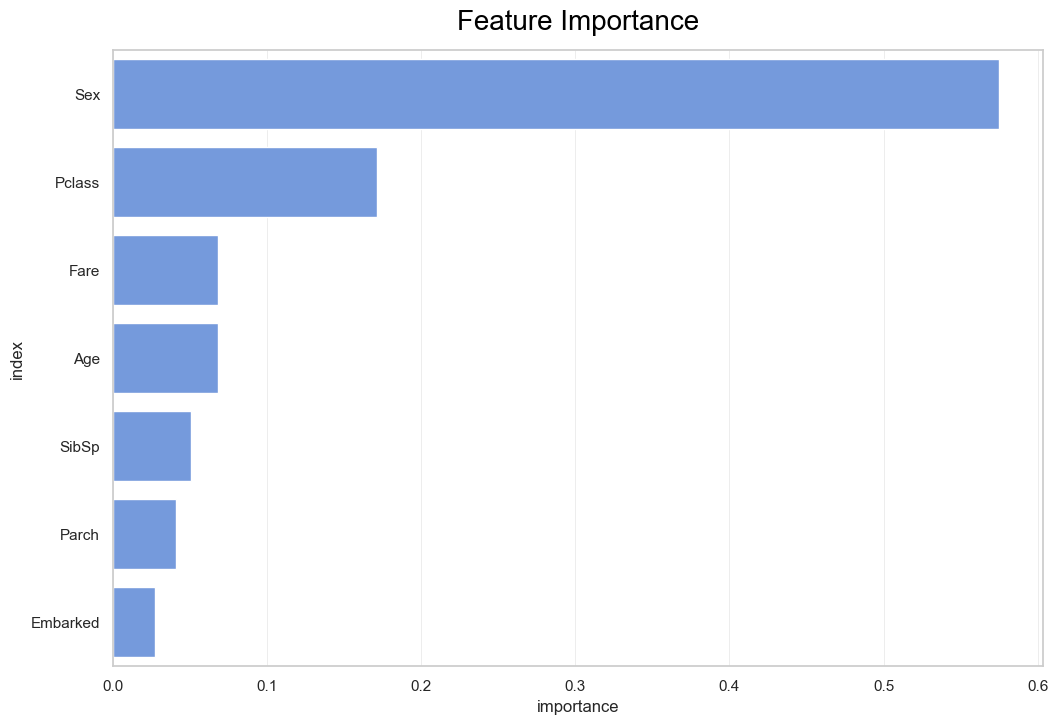

In [41]:
# Assign feature importance to the dataframe
feature_importance = pd.DataFrame(
    clf.feature_importances_, 
    index=X.columns, 
    columns=['importance']).sort_values('importance', ascending=False).reset_index()

# Plotting feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='importance', y='index', color='#6495ED')
plt.title('Feature Importance', fontsize=20, color='black', pad=15)
plt.show()

**Random Forest**

In [43]:
rfc=RandomForestClassifier(random_state=42)
random.seed(12345)
param_grid = { 
    'n_estimators': [10, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'bootstrap':[True, False]
}

In [44]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 500]})

In [45]:
CV_rfc.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 500}

In [46]:
random.seed(12345)
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=7, bootstrap=True, criterion='entropy')

In [47]:
rfc1.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=7, max_features='auto',
                       n_estimators=500, random_state=42)

In [48]:
y_pred_rfc=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,y_pred_rfc))

Accuracy for Random Forest on CV data:  0.8156424581005587


In [49]:
# Confusion_matrix
cm = confusion_matrix(y_test, y_pred_rfc)
cm_df = pd.DataFrame(cm, 
            columns = ['pred 0', 'pred 1'],
            index = ['act 0', 'act 1'])
cm_df

,pred 0,pred 1
act 0,95,10
act 1,23,51


In [51]:
print("Classification Report")
print(classification_report(y_test,y_pred_rfc))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [52]:
balanced_accuracy_score(y_test,y_pred_rfc)

0.796975546975547

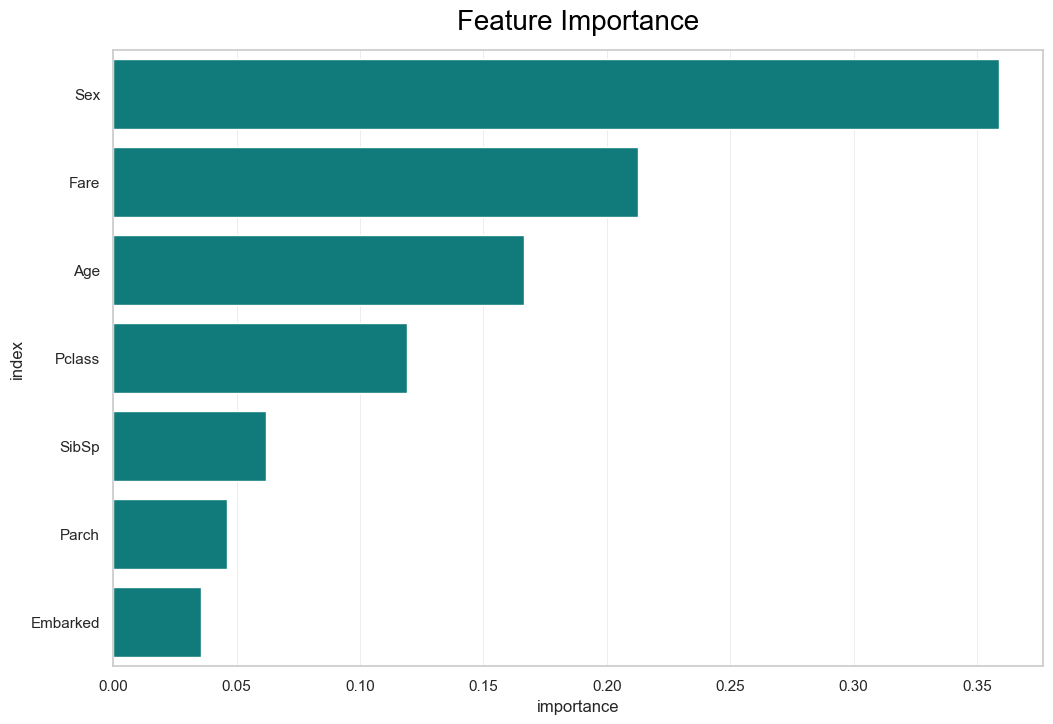

In [53]:
# Assign feature importance to the dataframe
feature_importance = pd.DataFrame(
    rfc1.feature_importances_, 
    index=X.columns, 
    columns=['importance']).sort_values('importance', ascending=False).reset_index()

# Plotting feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='importance', y='index', color='#008B8B')
plt.title('Feature Importance', fontsize=20, color='black', pad=15)
plt.show()

**Gradient Boosting**

In [55]:
crossvalidation = KFold(n_splits=10, shuffle = True, random_state=42)

In [57]:
gbc=GradientBoostingClassifier()
param_gb = { 
    'n_estimators': [50,300],
    'max_depth' : [1,2,3,4,7,8],
    'subsample': [0.5,0.75],
    'learning_rate':[0.05, 0.1],
    'random_state':[42]
}

In [58]:
search = GridSearchCV(estimator=gbc,
                     param_grid=param_gb,
                     scoring= 'accuracy',
                     n_jobs= 1,
                     cv= crossvalidation)
search

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.05, 0.1],
                         'max_depth': [1, 2, 3, 4, 7, 8],
                         'n_estimators': [50, 300], 'random_state': [42],
                         'subsample': [0.5, 0.75]},
             scoring='accuracy')

In [59]:
search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.05, 0.1],
                         'max_depth': [1, 2, 3, 4, 7, 8],
                         'n_estimators': [50, 300], 'random_state': [42],
                         'subsample': [0.5, 0.75]},
             scoring='accuracy')

In [60]:
search.best_params_

{'learning_rate': 0.05,
 'max_depth': 2,
 'n_estimators': 300,
 'random_state': 42,
 'subsample': 0.5}

In [15]:
random.seed(12345)
gb1=GradientBoostingClassifier(learning_rate=0.05,max_depth=2,n_estimators=300,subsample=0.5,random_state=42)
gb1.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, n_estimators=300,
                           random_state=42, subsample=0.5)

In [62]:
y_pred_gb=gb1.predict(X_test)

# Confusion_matrix
cm = confusion_matrix(y_test, y_pred_gb)
cm_gb = pd.DataFrame(cm, 
            columns = ['pred 0', 'pred 1'],
            index = ['act 0', 'act 1'])
cm_gb

,pred 0,pred 1
act 0,93,12
act 1,20,54


In [63]:
print("Accuracy for Gradient Boosting on CV data: ",accuracy_score(y_test,y_pred_gb))

Accuracy for Gradient Boosting on CV data:  0.8212290502793296


In [64]:
# Classification report model
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [65]:
balanced_accuracy_score(y_test,y_pred_gb)

0.8077220077220078

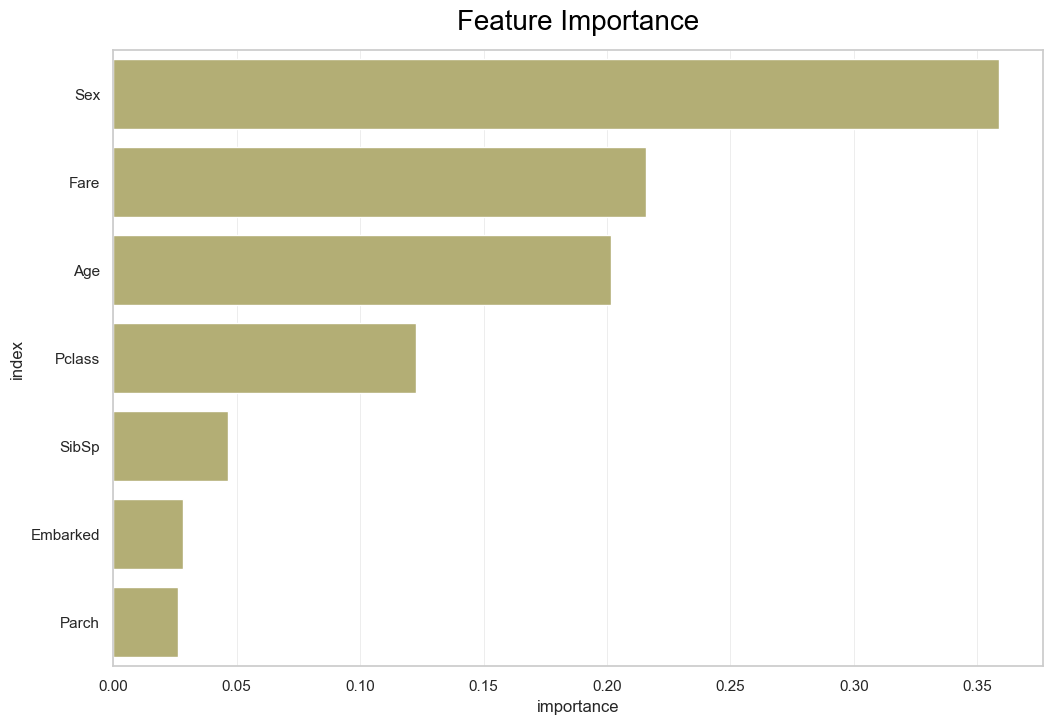

In [66]:
# Assign feature importance to the dataframe
feature_importance = pd.DataFrame(
    gb1.feature_importances_, 
    index=X.columns, 
    columns=['importance']).sort_values('importance', ascending=False).reset_index()

# Plotting feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='importance', y='index', color='#BDB76B')
plt.title('Feature Importance', fontsize=20, color='black', pad=15)
plt.show()

Balanced accuracy adalah perhitungan rata-rata proporsi benar tiap kelas. Dalam kasus biner, balanced accuracy sama dengan rata-rata aritmatika sensitivitas (tingkat positif sejati) dan spesifisitas (tingkat negatif sejati). Dalam kasus kali ini, setelah dilakukan optimasi hyperparameter diperoleh balance accuracy tertinggi terdapat pada model gradient boosting. Dari segi accuracy, presisi, dan recall, metode gradient boosting juga menunjukkan hasil yang lebih baik. Oleh karena itu untuk memprediksi data baru akan menggunakan model `gradient boosting`. 

Hasil Evaluasi Model Gradient Boosting:
- Accuracy : 82,12%
- Balanced Accuracy : 80,77%
- Presisi : 82%
- Recall : 82%
- F1-Score : 82%

## **Prediksi Data Baru**

In [16]:
# Load dataset 
df2= pd.read_csv('test.csv')
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
df2=df2.drop(["PassengerId","Name","Cabin","Ticket"],axis=1)

In [18]:
df2["Sex"]=df2.Sex.map({"male":0,"female":1})

In [19]:
obj_dict = {
    'C':1,
    'S':2,
    'Q':3
}
df2['Embarked'] = df2['Embarked'].replace(obj_dict)

Pengecekan data missing pada data yang akan diprediksi

In [20]:
df2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

Penanganan data missing

In [21]:
df2.Age=df2.Age.fillna(df2.Age.median())

In [22]:
df2.Fare=df2.Age.fillna(df2.Fare.median())

Memprediksi data baru

In [23]:
y_pred_new=pd.DataFrame()
y_pred_new['Predicted']=pd.DataFrame(gb1.predict(df2))
y_pred_new['Predicted'] = y_pred_new['Predicted'].map({0:'No', 1:'Yes'})
y_pred_new

,Predicted
0,No
1,No
2,No
3,No
4,No
...,...
413,No
414,Yes
415,No
416,No


In [24]:
y_pred_new.to_csv('Prediksi Data Baru Gradient Boosting.csv', sep=",", index = False)